**Tabla de contenido**

- [Cuándo usar el aprendizaje profundo para la predicción de series temporales](#Cuando-usar-el-aprendizaje-profundo-para-la-prediccion-de-series-temporales)
- [Explorando los diferentes tipos de modelos de aprendizaje profundo](#Explorando-los-diferentes-tipos-de-modelos-de-aprendizaje-profundo)
- [Preparándose para aplicar el aprendizaje profundo para la predicción](#Preparandose-para-aplicar-el-aprendizaje-profundo-para-la-prediccion)
    - [Realizando exploración de datos](#Realizando-exploracion-de-datos)
    - [Ingeniería de características y división de datos](#Ingenieria-de-caracteristicas-y-division-de-datos)
- [Próximos pasos](#Proximos-pasos)
- [Resumen](#Resumen)

`Pronóstico a gran escala con aprendizaje profundo`

Los modelos estadísticos tienen sus limitaciones, especialmente cuando un conjunto de datos es grande y tiene muchas características y relaciones no lineales. En tales casos, el aprendizaje profundo es la herramienta perfecta para la predicción de series temporales. En esta parte del libro, trabajaremos con un conjunto de datos masivo y aplicaremos diferentes arquitecturas de aprendizaje profundo, como la memoria a largo y corto plazo (LSTM), una red neuronal convolucional (CNN) y una red neuronal profunda autorregresiva, para predecir el futuro de nuestras series. Nuevamente, concluremos esta parte con un proyecto final para poner a prueba tus habilidades.

El aprendizaje profundo es un subconjunto del aprendizaje automático, por lo que es posible utilizar algoritmos de aprendizaje automático más tradicionales para la predicción de series temporales, como los árboles de gradiente. Para mantener esta sección razonable, no cubriremos esas técnicas específicamente, aunque se requiere el uso de ventanas de datos para predecir series temporales con aprendizaje automático, y aplicaremos este concepto numerosas veces.

En el último capítulo, concluyeron la parte del libro sobre la `predicción de series temporales utilizando modelos estadísticos. Esos modelos funcionan particularmente bien cuando se tienen conjuntos de datos pequeños (generalmente menos de 10,000 puntos de datos) y cuando el periodo estacional es mensual, trimestral o anual`. En situaciones donde se tiene estacionalidad diaria o donde el conjunto de datos es muy grande (más de 10,000 puntos de datos), esos modelos estadísticos se vuelven muy lentos y su rendimiento se degrada.

Por lo tanto, nos dirigimos al aprendizaje profundo. El aprendizaje profundo es un subconjunto del aprendizaje automático que se centra en construir modelos sobre la arquitectura de redes neuronales. El aprendizaje profundo tiene la ventaja de que tiende a funcionar mejor a medida que hay más datos disponibles, lo que lo convierte en una excelente opción para la previsión de series temporales de alta dimensión.

En esta parte del libro, exploraremos varias arquitecturas de modelos para que tengas un conjunto de herramientas para abordar prácticamente cualquier problema de pronóstico de series temporales. Ten en cuenta que asumiré que tienes cierta familiaridad con el aprendizaje profundo, por lo que deben ser conocidos temas como funciones de activación, funciones de pérdida, lotes, capas y épocas. Esta parte del libro no servirá como una introducción al aprendizaje profundo, sino que se centra en aplicar el aprendizaje profundo al pronóstico de series temporales. Por supuesto, cada arquitectura de modelo será explicada en detalle, y ganarás intuición sobre por qué una arquitectura particular podría funcionar mejor que otra en situaciones específicas. A lo largo de estos capítulos, utilizaremos TensorFlow, o más específicamente Keras, para construir diferentes modelos de aprendizaje profundo.

En este capítulo en particular, identificamos las condiciones que justifican el uso del aprendizaje profundo y exploramos los diferentes tipos de modelos que se pueden construir, como modelos de un solo paso, de múltiples pasos y de múltiples salidas. Concluiremos el capítulo con la configuración inicial que nos preparará para aplicar modelos de aprendizaje profundo en los siguientes capítulos. Finalmente, exploraremos los datos, realizaremos ingeniería de características y dividiremos los datos en conjuntos de entrenamiento, validación y prueba.


# Cuando usar el aprendizaje profundo para la prediccion de series temporales

`El aprendizaje profundo brilla cuando tenemos grandes conjuntos de datos complejos`. En esas situaciones, el aprendizaje profundo puede aprovechar todos los datos disponibles para inferir relaciones entre cada característica y el objetivo, lo que generalmente resulta en buenas predicciones.

En el contexto de las series temporales, un conjunto de datos se considera grande cuando tenemos más de 10,000 puntos de datos. Por supuesto, esto es una aproximación más que un límite estricto, así que si tienes 8,000 puntos de datos, el aprendizaje profundo podría ser una opción viable. Cuando el tamaño del conjunto de datos es grande, cualquier declinación del modelo SARIMAX tardará mucho tiempo en ajustarse, lo cual no es ideal para la selección del modelo, ya que generalmente ajustamos muchos modelos durante ese paso.

Si tus datos tienen múltiples períodos estacionales, no se puede utilizar el modelo SARIMAX. Por ejemplo, supongamos que debes predecir la temperatura por hora. Es razonable suponer que habrá estacionalidad diaria, ya que la temperatura tiende a ser más baja por la noche y más alta durante el día, pero también hay estacionalidad anual, debido a que las temperaturas son más bajas en invierno y más altas en verano. En tal caso, se puede utilizar el aprendizaje profundo para aprovechar la información de ambos períodos estacionales para hacer pronósticos. De hecho, por experiencia, ajustar un modelo SARIMA en tal caso generalmente resultará en residuos que no están distribuidos normalmente y que aún están correlacionados, lo que significa que el modelo no puede ser utilizado en absoluto.

`En última instancia, el aprendizaje profundo se utiliza cuando los modelos estadísticos tardan demasiado en ajustarse o cuando resultan en residuos correlacionados que no se asemejan al ruido blanco`. Esto puede deberse al hecho de que existe otro período estacional que no se puede considerar en el modelo, o simplemente porque hay una relación no lineal entre las características y el objetivo. En esos casos, se pueden utilizar modelos de aprendizaje profundo para capturar esta relación no lineal, y tienen la ventaja adicional de ser muy rápidos de entrenar.


# Explorando los diferentes tipos de modelos de aprendizaje profundo

Hay tres tipos principales de modelos de aprendizaje profundo que podemos construir para la predicción de series temporales:
1. `modelos de un solo paso`: El modelo de un solo paso es el más sencillo de los tres. Su salida es un único valor que representa la previsión de una variable un paso en el futuro. Por lo tanto, el modelo simplemente devuelve un escalar.
2. `modelos de múltiples pasos`: Podemos tener un modelo de múltiples pasos, lo que significa que obtenemos el valor para un objetivo, pero para muchos pasos de tiempo en el futuro. Por ejemplo, dado datos horarios, es posible que deseemos pronosticar las próximas 24 horas. En ese caso, tenemos un modelo de múltiples pasos, ya que estamos pronosticando 24 pasos de tiempo en el futuro. 
3. `modelos de múltiples salidas`:genera predicciones para más de un objetivo. Por ejemplo, si quisiéramos predecir tanto la temperatura como la humedad, utilizaríamos un modelo de múltiples salidas. Este modelo puede generar tantos pasos de tiempo como se desee.

Cada uno de estos modelos puede tener arquitecturas diferentes. Por ejemplo, una red neuronal convolucional puede usarse como un modelo de un solo paso, un modelo de varios pasos o un modelo de múltiples salidas.

Esto nos lleva a la etapa donde realizaremos la configuración inicial para los diferentes modelos de aprendizaje profundo que implementaremos en los próximos cinco capítulos.

# Preparandose para aplicar el aprendizaje profundo para la prediccion

Desde aquí hasta el capítulo 17, utilizaremos el conjunto de datos de volumen de tráfico interurbano del metro disponible en el repositorio de aprendizaje automático de UCI. El conjunto de datos original registró el tráfico horario en dirección oeste en la I-94 entre Minneapolis y St. Paul en Minnesota, desde 2012 hasta 2018. Con el propósito de aprender a aplicar el aprendizaje profundo para la predicción de series temporales, el conjunto de datos ha sido acortado y limpiado para deshacerse de los valores faltantes. Aunque los pasos de limpieza no se cubren en este capítulo, aún puedes consultar el código de preprocesamiento en el repositorio de GitHub para este capítulo. Nuestro objetivo principal de pronóstico es predecir el volumen de tráfico por hora. En el caso de modelos de múltiples salidas, también pronosticaremos la temperatura horaria. En esta configuración inicial para los próximos capítulos, cargaremos los datos, realizaremos la ingeniería de características y los dividiremos en conjuntos de entrenamiento, validación y prueba.

Usaremos TensorFlow, o más específicamente Keras, en esta parte del libro.

## Realizando exploracion de datos

Primero cargaremos los datos utilizando pandas

In [1]:
import pandas as pd
import os

file_path = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(file_path('metro_interstate_traffic_volume_preprocessed.csv'))

Como se mencionó, este conjunto de datos es una versión abreviada y limpia del conjunto de datos original disponible en el repositorio de aprendizaje automático de UCI. En este caso, el conjunto de datos comienza el 29 de septiembre de 2016 a las 5 p.m. y termina el 30 de septiembre de 2018 a las 11 p.m. Usando df.shape, podemos ver que tenemos un total de seis características y 17,551 filas.

Las características incluyen la fecha y hora, la temperatura, la cantidad de lluvia y nieve, la cobertura de nubes, así como el volumen de tráfico.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17551 entries, 0 to 17550
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       17551 non-null  object 
 1   temp            17551 non-null  float64
 2   rain_1h         17551 non-null  float64
 3   snow_1h         17551 non-null  int64  
 4   clouds_all      17551 non-null  int64  
 5   traffic_volume  17551 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 822.8+ KB


Ahora, visualicemos la evolución del volumen de tráfico a lo largo del tiempo. Dado que nuestro conjunto de datos es muy grande, con más de 17,000 registros, solo trazaremos los primeros 400 puntos de datos, que es aproximadamente equivalente a dos semanas de datos.

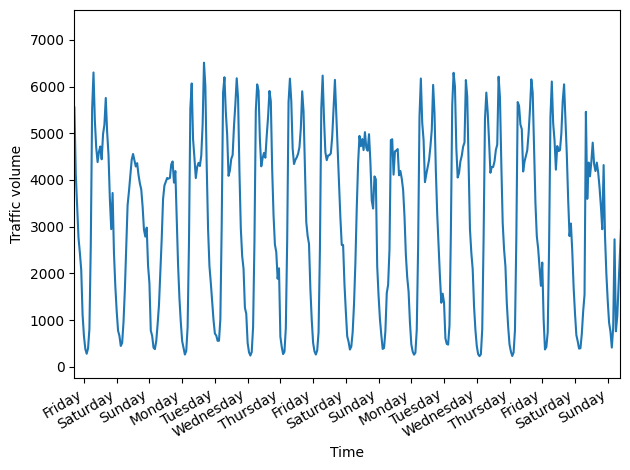

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.plot(df['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday',
                                   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                                   'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                   'Saturday', 'Sunday'])
plt.xlim(0, 400)
fig.autofmt_xdate()
plt.tight_layout()

En la figura notarás una clara estacionalidad diaria, ya que el volumen de tráfico es más bajo al inicio y al final de cada día. También verás un volumen de tráfico menor durante los fines de semana. En cuanto a la tendencia, dos semanas de datos probablemente sean insuficientes para sacar una conclusión razonable, pero parece que el volumen no está aumentando ni disminuyendo a lo largo del tiempo en la figura.

También podemos graficar la temperatura diaria, ya que será un objetivo para nuestros modelos de múltiples salidas. Aquí, esperamos ver tanto estacionalidad anual como diaria. La estacionalidad anual debería deberse a las estaciones del año, mientras que la estacionalidad diaria será debido al hecho de que las temperaturas tienden a ser más bajas por la noche y más altas durante el día.

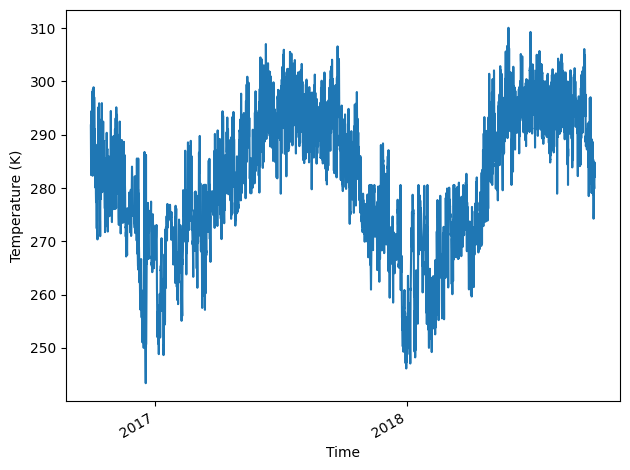

In [4]:
fig, ax = plt.subplots()
ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')
plt.xticks([2239, 10999], [2017, 2018])
fig.autofmt_xdate()
plt.tight_layout()

En la figura verás un patrón estacional anual en la temperatura horaria, ya que las temperaturas son más bajas al final y al principio del año (invierno en Minnesota), y más altas a mitad del año (verano). Por lo tanto, como se esperaba, la temperatura tiene estacionalidad anual.

Ahora verifiquemos si podemos observar la estacionalidad diaria en la temperatura. 

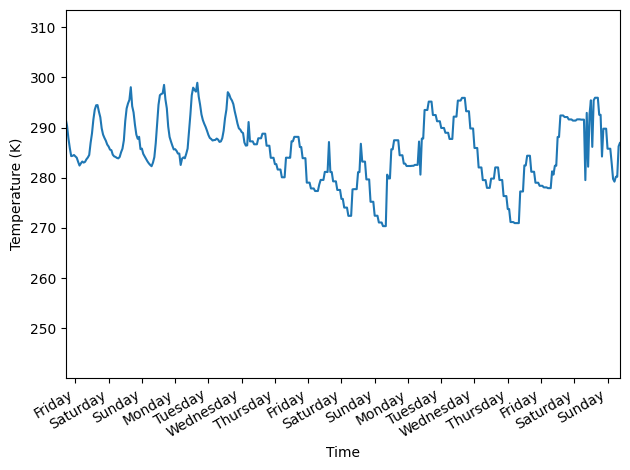

In [5]:
fig, ax = plt.subplots()
ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday',
                                   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                                   'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                   'Saturday', 'Sunday'])
plt.xlim(0, 400)
fig.autofmt_xdate()
plt.tight_layout()

En la figura notarás que la temperatura es efectivamente más baja al principio y al final de cada día y alcanza su punto máximo hacia la mitad de cada día. Esto sugiere estacionalidad diaria.

## Ingenieria de caracteristicas y division de datos

Con nuestra exploración de datos completa, pasaremos a la ingeniería de características y la división de datos. En esta sección, estudiaremos cada característica y crearemos nuevas que ayudarán a nuestros modelos a predecir el volumen de tráfico y la temperatura horaria. Finalmente, dividiremos los datos y guardaremos cada conjunto como un archivo CSV para su uso posterior.

Una excelente manera de estudiar las características de un conjunto de datos es usar el método describe de pandas. Este método devuelve el número de registros para cada característica, lo que nos permite identificar rápidamente los valores faltantes, la media, la desviación estándar, los cuartiles, y los valores máximo y mínimo para cada característica.


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


En la salida, notarás que `rain_1h` es principalmente 0 en todo el conjunto de datos, ya que su tercer cuartil sigue siendo 0. Dado que al menos el 75% de los valores para rain_1h son 0, es poco probable que sea un fuerte predictor del volumen de tráfico. Por lo tanto, esta característica será eliminada.

Al observar `snow_1h`, notarás que esta variable está en 0 a lo largo de todo el conjunto de datos. Esto es fácilmente observable, ya que sus valores mínimo y máximo son ambos 0. Por lo tanto, esto no es predictivo de la variación en el volumen de tráfico a lo largo del tiempo. Esta característica también será eliminada del conjunto de datos.


In [7]:
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)

Ahora llegamos al interesante problema de codificar el tiempo como una característica utilizable para nuestros modelos de aprendizaje profundo. En este momento, la característica de fecha_hora no es utilizable por nuestros modelos, ya que es una cadena de fecha y hora. Por lo tanto, la convertiremos en un valor numérico.

Una forma sencilla de hacer eso es expresar la fecha como un número de segundos. Esto se logra mediante el uso del método timestamp de la biblioteca datetime.

In [8]:
import datetime
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)
timestamp_s.head()

0    1.475186e+09
1    1.475190e+09
2    1.475194e+09
3    1.475197e+09
4    1.475201e+09
Name: date_time, dtype: float64

Desafortunadamente, no hemos terminado, ya que esto simplemente expresa cada fecha en segundos. Esto nos lleva a perder la naturaleza cíclica del tiempo, porque el número de segundos simplemente aumenta linealmente con el tiempo.

Por lo tanto, `debemos aplicar una transformación para recuperar el comportamiento cíclico del tiempo`. Una forma simple de hacerlo es aplicar una transformación de seno. Sabemos que la función seno es cíclica, acotada entre -1 y 1. Esto nos ayudará a recuperar parte de la propiedad cíclica del tiempo.

1. La marca de tiempo está en segundos, así que debemos calcular el número de segundos en un día antes de aplicar la transformación seno.
2. Aplicación de la transformación seno. Observe que utilizamos radianes en la función seno.

In [ ]:
day = 24 * 60 * 60 #1
df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values #2

Con una sola transformación seno, recuperamos algunas de las propiedades cíclicas que se perdieron al convertir a segundos. Sin embargo, en este punto, las 12 p.m. son equivalentes a las 12 a.m., y las 5 p.m. son equivalentes a las 5 a.m. Esto no es deseado, ya que queremos distinguir entre la mañana y la tarde. Por lo tanto, aplicaremos una transformación coseno.

Sabemos que el coseno está fuera de fase con la función seno. Esto nos permite distinguir entre las 5 a.m. y las 5 p.m., expresando la naturaleza cíclica del tiempo en un día. En este punto, podemos eliminar la columna date_time del DataFrame.

1. Aplique la transformación del coseno a la marca de tiempo en segundos.
2. Elimine la columna date_time.

In [10]:
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values #1
df = df.drop(['date_time'], axis=1)

Podemos convencernos rápidamente de que estas transformaciones funcionaron trazando una muestra de day_sin y day_cos.

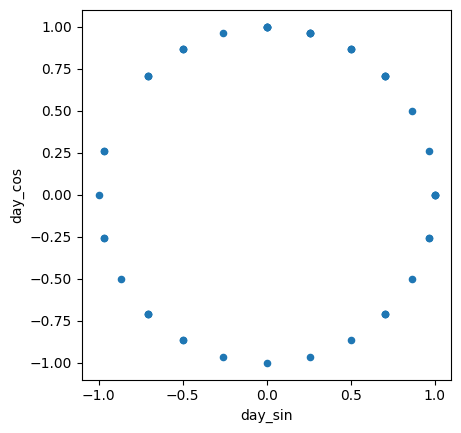

In [11]:
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');

En la figura notarás que los puntos forman un círculo, como un reloj. Por lo tanto, hemos expresado con éxito cada marca de tiempo como un punto en el reloj, lo que significa que ahora tenemos valores numéricos que retienen el cíclico naturaleza del tiempo en un día, y esto se puede utilizar en nuestros modelos de aprendizaje profundo.

Esto será útil ya que observamos la estacionalidad diaria tanto para la temperatura como para el volumen de tráfico.

Con la ingeniería de características completa, ahora podemos dividir nuestros datos en conjuntos de entrenamiento, validación y prueba. 
- `El conjunto de entrenamiento` es la muestra de datos utilizada para ajustar el modelo. 
- `El conjunto de validación` es un poco como un conjunto de prueba al que el modelo puede tener acceso para ajustar sus hiperparámetros y mejorar su rendimiento durante el entrenamiento del modelo. 
- `El conjunto de prueba` está completamente separado del procedimiento de entrenamiento del modelo y se utiliza para una evaluación imparcial del rendimiento del modelo.

Aquí usaremos una simple división 70:20:10 para los conjuntos de entrenamiento, validación y prueba. Aunque el 10% de los datos parece una porción pequeña para el conjunto de prueba, recuerda que tenemos más de 17,000 registros, lo que significa que evaluaremos el modelo en más de 1,000 puntos de datos, lo cual es más que suficiente.

In [14]:
n = len(df)
# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]             #El primer 70% va al conjunto de entrenamiento.
val_df = df[int(n*0.7):int(n*0.9)]      # El siguiente 20% va al conjunto de validación.
test_df = df[int(n*0.9):]               # El 10% restante va al conjunto de prueba.

Antes de guardar los datos, debemos escalarlo para que todos los valores estén entre 0 y 1. Esto disminuye el tiempo requerido para el entrenamiento de modelos de aprendizaje profundo y mejora su rendimiento. Usaremos MinMaxScaler de sklearn para escalar nuestros datos.

`Tenga en cuenta que ajustaremos el escalador en el conjunto de entrenamiento para evitar la filtración de datos`. De esa manera, estamos simulando el hecho de que solo tenemos los datos de entrenamiento disponibles cuando usamos el modelo, y el modelo no conoce ninguna información futura. La evaluación del modelo permanece imparcial.


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df) #Ajustado solo en el conjunto de entrenamiento.

train_df = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns, index=train_df.index)
val_df= pd.DataFrame(scaler.transform(val_df), columns=val_df.columns, index=val_df.index)
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns, index=test_df.index)

Vale la pena mencionar por qué los datos están escalados y no normalizados. Escala y normalización pueden ser términos confusos para los científicos de datos, ya que a menudo se utilizan de manera intercambiable. En resumen, escalar los datos afecta solo su escala y no su distribución. Por lo tanto, simplemente fuerza los valores a un cierto rango. En nuestro caso, forzamos los valores a estar entre 0 y 1.

Normalizar los datos, por otro lado, afecta su distribución y su escala. Así, normalizar los datos obligaría a tener una distribución normal o una distribución gaussiana. El rango original también cambiaría, y trazar la frecuencia de cada valor generaría una curva de campana clásica.

`Normalizar los datos solo es útil cuando los modelos que usamos requieren que los datos sean normales`. Por ejemplo, el análisis discriminante lineal (LDA) se basa en la suposición de una distribución normal, por lo que es mejor normalizar los datos antes de usar LDA. Sin embargo, en el caso del aprendizaje profundo, no se realizan suposiciones, por lo que no es necesario normalizar.

Finalmente, guardaremos cada conjunto como un archivo CSV para su uso en los capítulos siguientes.

In [16]:
train_df.to_csv('data/train.csv')
val_df.to_csv('data/val.csv')
test_df.to_csv('data/test.csv')

# Proximos pasos

En este capítulo, analizamos el uso del aprendizaje profundo para la predicción y cubrimos los tres tipos principales de modelos de aprendizaje profundo. Luego exploramos los datos que utilizaremos y realizamos ingeniería de características para que los datos estén listos para ser usados en el próximo capítulo, donde aplicaremos modelos de aprendizaje profundo para pronosticar el volumen de tráfico.

En el próximo capítulo, comenzaremos implementando modelos base que servirán como referencia para arquitecturas de aprendizaje profundo más complejas. También implementaremos modelos lineales, los modelos más simples que se pueden construir, seguidos por redes neuronales profundas, que tienen al menos una capa oculta. Los modelos base, los modelos lineales y las redes neuronales profundas se implementarán como modelos de un solo paso, modelos de múltiples pasos y modelos de múltiples salidas. Debes estar emocionado por el próximo capítulo, ya que comenzaremos a modelar y pronosticar utilizando aprendizaje profundo.

# Resumen

El aprendizaje profundo para la predicción se utiliza cuando:
- El conjunto de datos es grande (más de 10,000 puntos de datos).
- La declinación del modelo SARIMAX tarda mucho tiempo en ajustarse.
- Los residuales del modelo estadístico aún muestran cierta correlación.
- Hay más de un período estacional.